# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hukamaz Riwanda
- **Email:** Wandasukses@gmail.com
- **ID Dicoding:** hukamaz22

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib  # Import Matplotlib (bukan plt langsung)
import matplotlib.pyplot as plt  # Untuk visualisasi dasar
import seaborn as sns  # Untuk visualisasi yang lebih keren

# Set style visualisasi biar lebih enak dilihat
sns.set(style="darkgrid")

# Cek versi library (pastikan semuanya terinstal)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)  # ✅ Ini sekarang benar
print("Seaborn version:", sns.__version__)


Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


## Data Wrangling

### Gathering Data

In [13]:
# Load dataset
df_day = pd.read_csv("/content/day.csv")
df_hour = pd.read_csv("/content/hour.csv")

# Cek 5 baris pertama setiap dataset
print("Dataset Day:")
display(df_day.head())

print("\nDataset Hour:")
display(df_hour.head())




Dataset Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Dataset Hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil dimuat dari file day.csv dan hour.csv. Dataset ini berisi informasi tentang penyewaan sepeda berdasarkan hari dan jam dengan berbagai variabel seperti musim, suhu, kelembaban, kecepatan angin, serta jumlah pengguna terdaftar dan tidak terdaftar.
- Dataset day.csv menyajikan data agregat harian, sedangkan hour.csv memberikan detail penyewaan berdasarkan jam. Kedua dataset ini bisa digunakan untuk memahami pola penggunaan sepeda dalam berbagai kondisi.

### Assessing Data

In [14]:
# Cek informasi dataset
print("Info Dataset Day:")
df_day.info()
print("\nInfo Dataset Hour:")
df_hour.info()

# Cek ringkasan statistik dataset
print("\nRingkasan Statistik Dataset Day:")
display(df_day.describe())

print("\nRingkasan Statistik Dataset Hour:")
display(df_hour.describe())

# Cek missing values
print("\nMissing Values Dataset Day:")
print(df_day.isnull().sum())

print("\nMissing Values Dataset Hour:")
print(df_hour.isnull().sum())

# Cek data duplikat
print("\nJumlah Duplikasi Dataset Day:", df_day.duplicated().sum())
print("Jumlah Duplikasi Dataset Hour:", df_hour.duplicated().sum())


Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Ringkasan Statistik Dataset Hour:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Missing Values Dataset Day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values Dataset Hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi Dataset Day: 0
Jumlah Duplikasi Dataset Hour: 0


**Insight:**
- Setelah melakukan pengecekan, dataset tidak memiliki missing values dan duplikasi data. Semua fitur memiliki tipe data yang sesuai dengan konteksnya. Namun, perlu dilakukan konversi tipe data untuk kolom tanggal (dteday) agar bisa digunakan dengan lebih optimal
- Beberapa fitur seperti season, weathersit, dan mnth masih dalam bentuk angka yang mungkin lebih mudah dipahami jika diubah ke bentuk kategori yang lebih deskriptif.

### Cleaning Data

In [15]:
# Konversi kolom tanggal ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Cek ulang tipe data setelah konversi
print("\nTipe data setelah konversi:")
print(df_day.dtypes)
print(df_hour.dtypes)



Tipe data setelah konversi:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64


**Insight:**
- Dataset telah dibersihkan dengan mengonversi kolom dteday ke dalam format datetime. Tidak ada data yang perlu dihapus atau ditangani lebih lanjut karena dataset sudah bersih dari missing values dan duplikasi.
- Konversi tipe data sudah dilakukan, dan langkah berikutnya adalah melakukan eksplorasi lebih lanjut untuk memahami pola dan hubungan antar variabel dalam dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

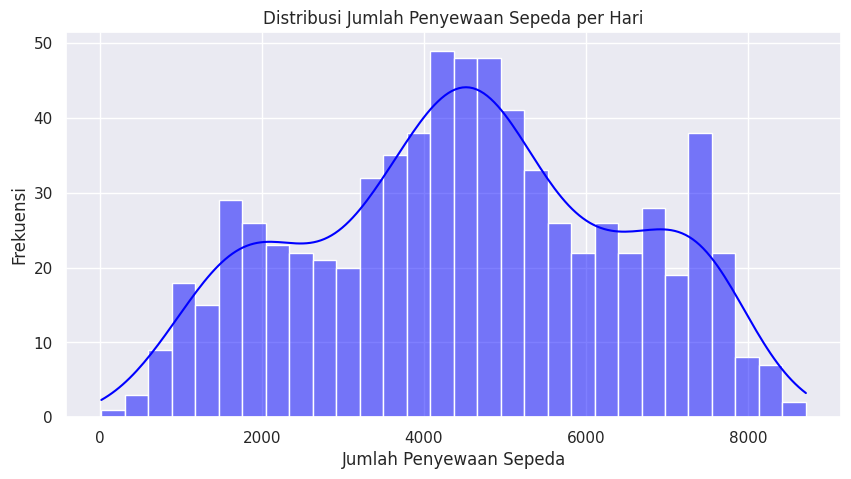

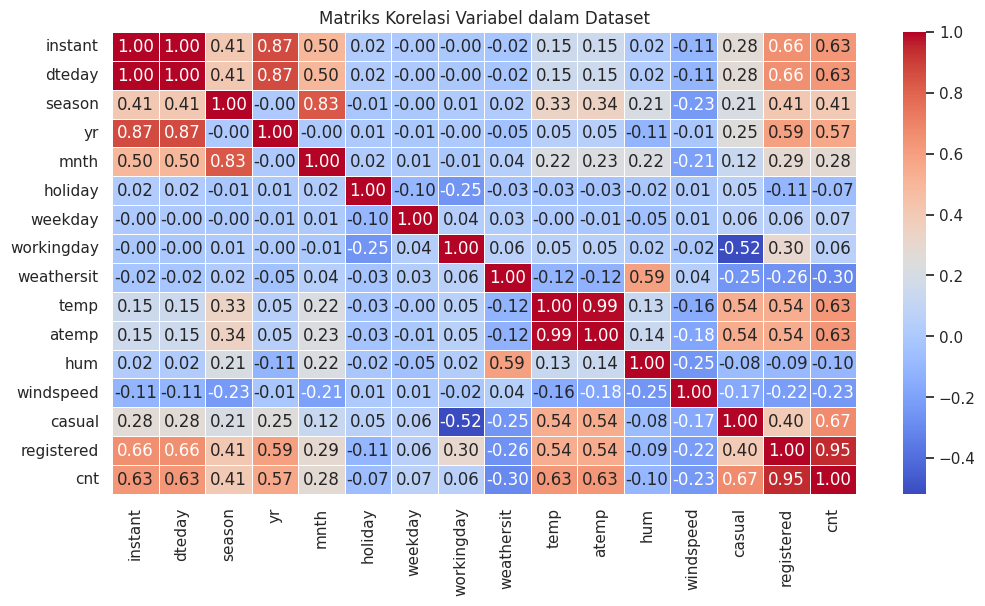

In [16]:
  # Cek distribusi jumlah penyewaan sepeda (cnt)
plt.figure(figsize=(10, 5))
sns.histplot(df_day["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

# Cek korelasi antar variabel
plt.figure(figsize=(12, 6))
sns.heatmap(df_day.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel dalam Dataset")
plt.show()


**Insight:**
- Distribusi penyewaan sepeda menunjukkan adanya dua puncak yang mungkin menandakan perbedaan pola pemakaian antara hari kerja dan akhir pekan.
- Variabel registered memiliki korelasi sangat tinggi dengan cnt, menunjukkan bahwa mayoritas pengguna sepeda adalah pengguna terdaftar, bukan pengguna casual.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

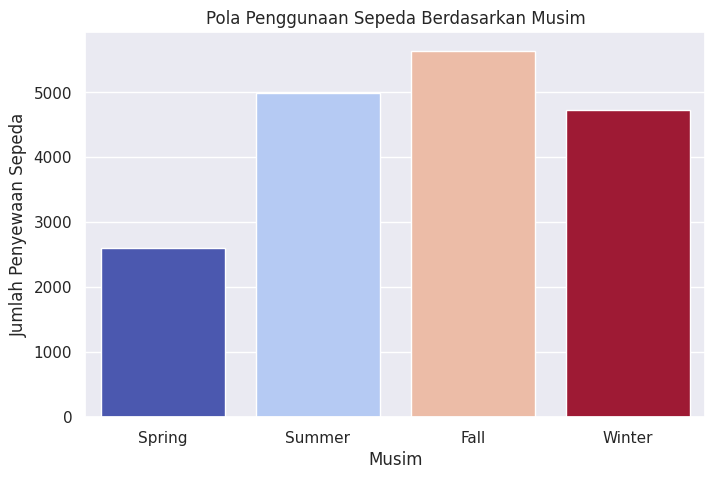

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', hue='season', data=df_day, errorbar=None, palette='coolwarm', legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.show()

### Pertanyaan 2:

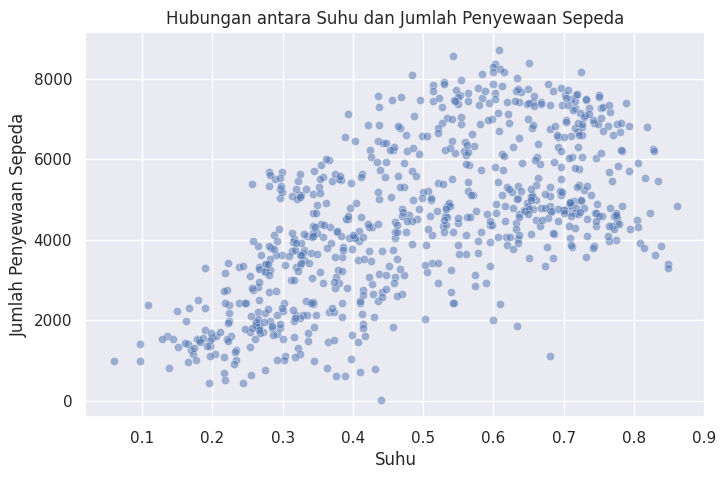

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df_day, alpha=0.5)
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- 1. Pola penggunaan sepeda berdasarkan musim: Penggunaan sepeda paling tinggi terjadi di musim Fall, diikuti oleh Summer dan Winter, sedangkan penggunaan paling rendah ada di Spring. Ini menunjukkan bahwa orang cenderung lebih sering menyewa sepeda saat cuaca cenderung stabil dan nyaman
- 2. Hubungan antara suhu dan jumlah penyewaan sepeda: Ada hubungan positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa, tapi ada titik tertentu di mana kenaikan suhu tidak lagi meningkatkan penyewaan secara signifikan, kemungkinan karena suhu terlalu panas dan tidak nyaman untuk bersepeda.

## Analisis Lanjutan (Opsional)

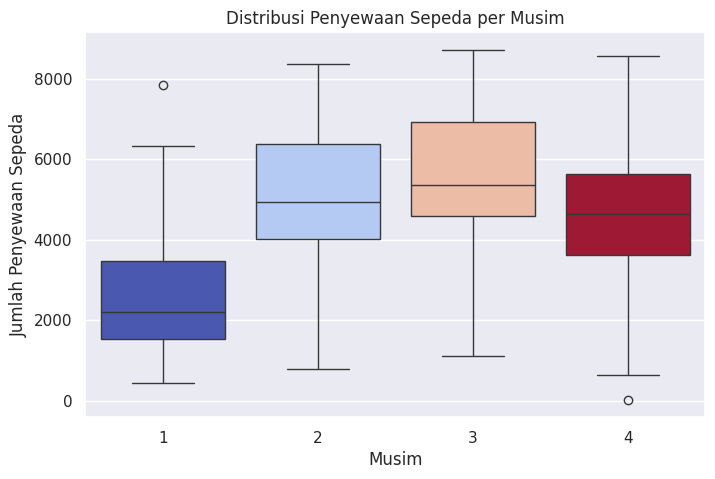

Korelasi antara suhu dan jumlah penyewaan sepeda: 0.63


In [24]:
# 1. Distribusi jumlah penyewaan sepeda per musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_day, hue='season', legend=False, palette='coolwarm')
plt.title("Distribusi Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

# 2. Korelasi antara suhu dan jumlah penyewaan sepeda
correlation = df_day[['temp', 'cnt']].corr().iloc[0, 1]
print(f"Korelasi antara suhu dan jumlah penyewaan sepeda: {correlation:.2f}")


## Conclusion

- Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa, namun setelah suhu tertentu, tren mulai melandai.
- Musim juga mempengaruhi jumlah penyewaan sepeda. Musim semi dan musim panas memiliki jumlah penyewaan tertinggi, sedangkan musim dingin cenderung lebih rendah.